# ADS Homework 3

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')

In [2]:
#Load the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


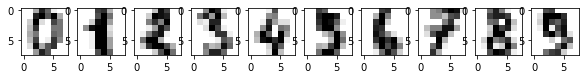

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
#import PCA modules
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [6]:
#set target variable (y) as index
df1=data
df1.set_index('y', inplace=True)
df1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
y,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.0,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0.0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8.0,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [7]:
# standardization
scaler_df1 = preprocessing.StandardScaler().fit(df1)
df_scaled =scaler_df1.transform(df1)  
df_scaled= pd.DataFrame(df_scaled, index=df1.index,columns=df1.columns)
df_scaled

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
y,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1.0,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2.0,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3.0,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4.0,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.0,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
0.0,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
8.0,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008


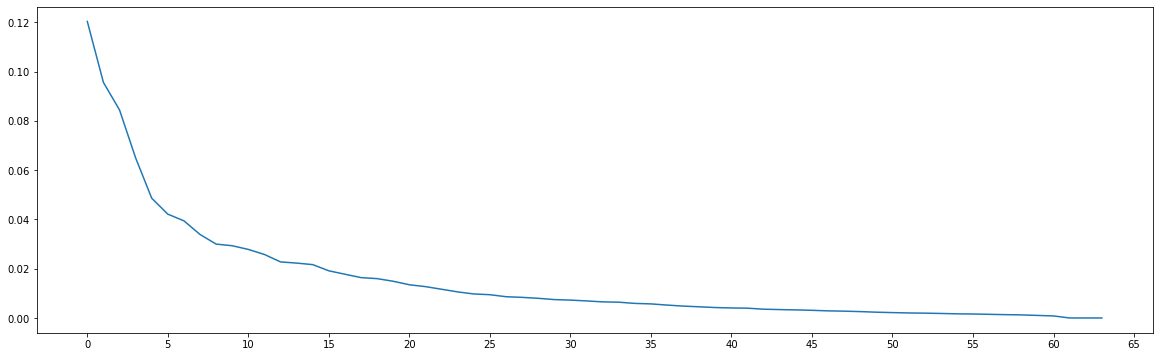

In [8]:
#Plot explained variance per number of leading PC's 
pca = PCA(df_scaled.shape[1])
data311P=pca.fit_transform(df_scaled)
eigenvalues = pca.explained_variance_ratio_
n=64
plt.figure(figsize = (20, 6))
plt.plot(np.arange(n),eigenvalues)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
#perform PC decomposition over data



In [9]:
print(eigenvalues)

[1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280e-34]


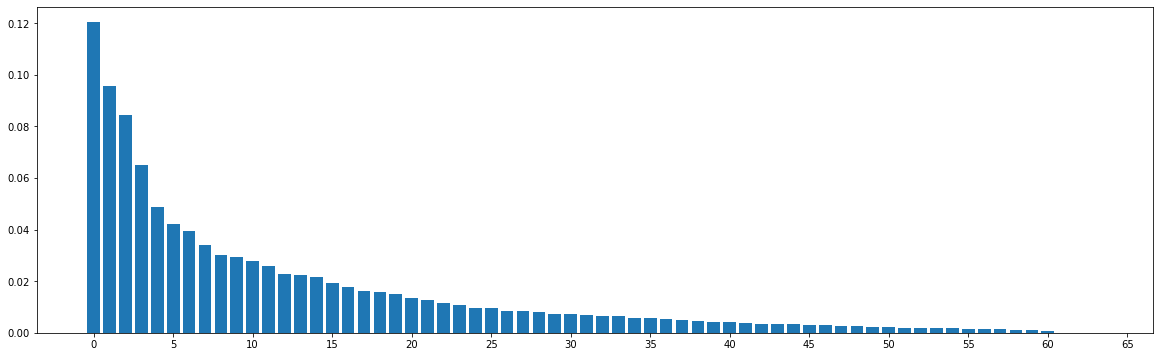

In [10]:
#Plot explained variance per number of leading PC's  by bar
plt.figure(figsize = (20, 6))
plt.bar(np.arange(n),eigenvalues)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

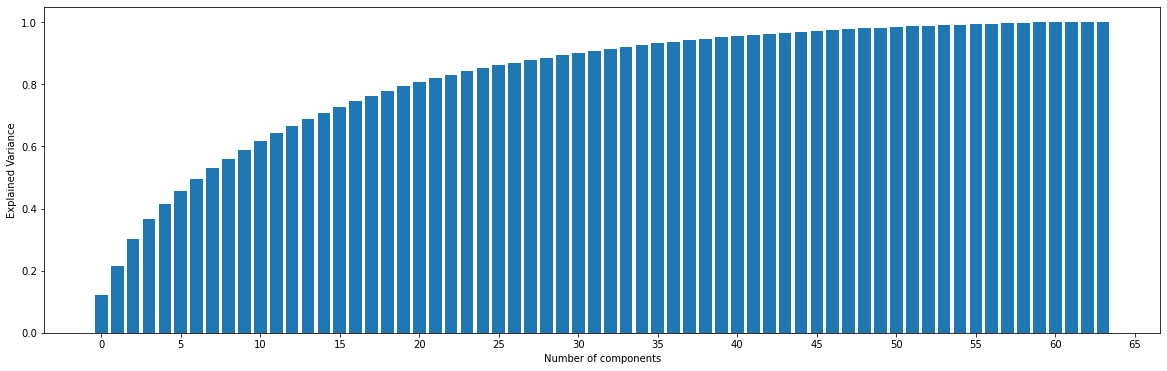

In [11]:
#perform PC decomposition over data
n=len(df1.columns)
plt.figure(figsize = (20, 6))
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

In [12]:
#describe in a few words what you can infer from the above plot

This figure shows the amount of variance explained by the dominant principal components in relation to the PCS. While the remaining PCS contribute less and less to the overall variance, the top five principal components account for most of the variance in the data. The slope of the curve becomes less steep after a certain number of PCSs and suggests that adding more PCSs at this point only slightly increases the explained variance.

### Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)

In [13]:
# create Digit labels in order to plot
X = load_digits()
labels = X.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
#reapply PCA with three components so we can visualize in 3 dimensions
pca = PCA(n_components=3)
data_3pc=pca.fit_transform(df_scaled)
eigenvalues = pca.explained_variance_ratio_
print(eigenvalues)

[0.12033916 0.09561054 0.08444415]


In [15]:
a=labels.tolist()
min(a),max(a)

(0, 9)

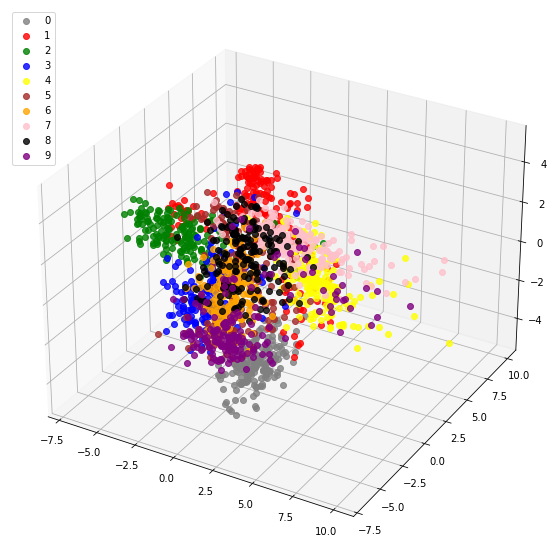

In [16]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors=('gray','red','green','blue','yellow','brown','orange','pink','black','purple')

for d in range(10):
    plt.plot(np.array(data_3pc[labels==d,0]), np.array(data_3pc[labels==d,1]), np.array(data_3pc[labels==d,2]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.legend(['0','1','2','3','4','5','6','7','8','9'],loc='upper left');


### Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (3 examples each)

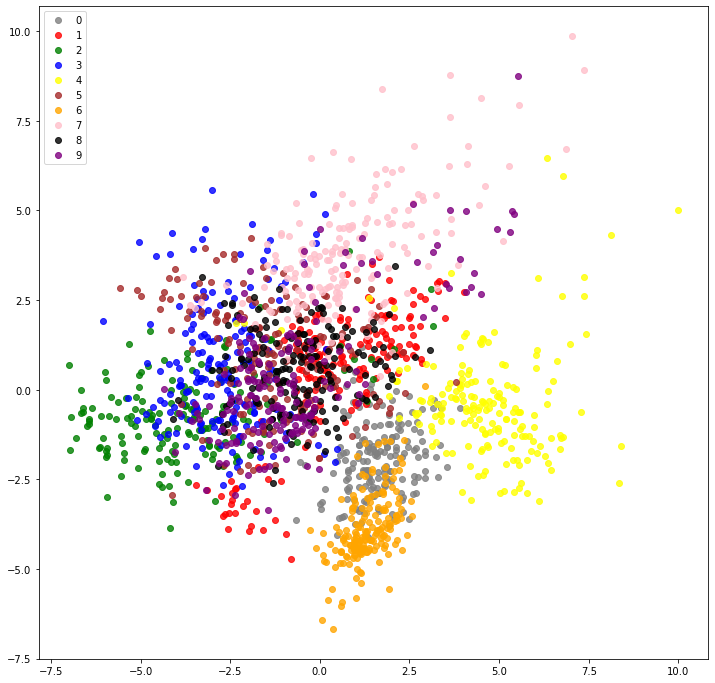

In [17]:
colors=('gray','red','green','blue','yellow','brown','orange','pink','black','purple')
fig = plt.figure(1, figsize=(12, 12))
for d in range(10):
    plt.plot(np.array(data_3pc[labels==d,0]), np.array(data_3pc[labels==d,1]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.legend(['0','1','2','3','4','5','6','7','8','9'],loc='upper left');

#### a) can be clearly distinguished

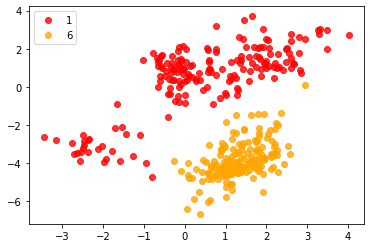

In [18]:
for d in [1,6]:
    plt.plot(np.array(data_3pc[y==d,0]), np.array(data_3pc[y==d,1]),'o', color=colors[d], alpha=0.8)
    plt.legend(['1','6'],loc='upper left');

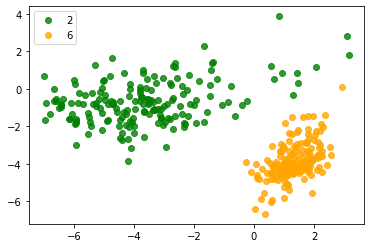

In [19]:
for d in [2,6]:
    plt.plot(np.array(data_3pc[y==d,0]), np.array(data_3pc[y==d,1]),'o', color=colors[d], alpha=0.8)
    plt.legend(['2','6'],loc='upper left');

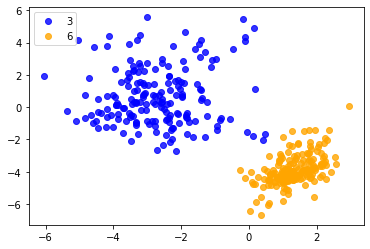

In [20]:
for d in [3,6]:
    plt.plot(np.array(data_3pc[y==d,0]), np.array(data_3pc[y==d,1]),'o', color=colors[d], alpha=0.8)
    plt.legend(['3','6'],loc='upper left');

#### b) can not be clearly distinguished

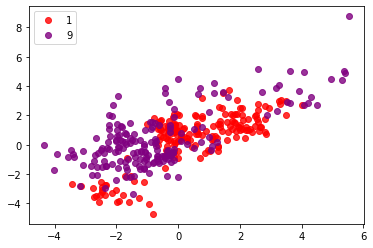

In [21]:
for d in [1,9]:
    plt.plot(np.array(data_3pc[y==d,0]), np.array(data_3pc[y==d,1]),'o', color=colors[d], alpha=0.8)
    plt.legend(['1','9'],loc='upper left');

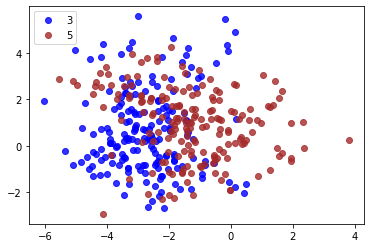

In [22]:
for d in [3,5]:
    plt.plot(np.array(data_3pc[y==d,0]), np.array(data_3pc[y==d,1]),'o', color=colors[d], alpha=0.8)
    plt.legend(['3','5'],loc='upper left');

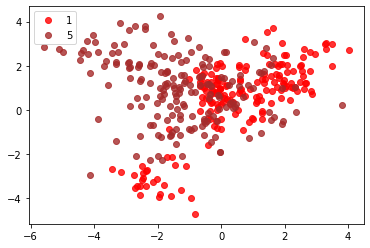

In [23]:
for d in [1,5]:
    plt.plot(np.array(data_3pc[y==d,0]), np.array(data_3pc[y==d,1]),'o', color=colors[d], alpha=0.8)
    plt.legend(['1','5'],loc='upper left');

## 2. PCA for feature engineering

Another common application of PCA is overcomming multicollinearity and overfitting in regression models. Here we'll use PCA for reducing dimensionality of a data set and improving the accuracy in the regression task.

In [24]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/pca_synthetic.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


### Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score

Split the data into training and test (choose 70:30 split) and report out of sample score with test data. Iterate for 20 times. Also comment on the significance of the regressors (based on p-values)

In [25]:
#Run a linear regression with 'Y' as the target and x1-x15 as regressors

In [26]:
Y=data.Y
lm=sm.OLS(Y,sm.add_constant(data.iloc[:,1:])).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     12.33
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.20e-09
Time:                        23:05:12   Log-Likelihood:                -53.727
No. Observations:                  50   AIC:                             139.5
Df Residuals:                      34   BIC:                             170.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2459      2.386     -4.295      0.0

In [27]:
import warnings
warnings.filterwarnings('ignore')
#Split the data into training and test (choose 70:30 split)
#report out of sample score with test data. Iterate for 20 times
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,1:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.871+-0.024
OS R-squared is 0.553+-0.173


In [28]:
#Also comment on the significance of the regressors (based on p-values)

If we set 5% significance level, we will have 9 regressors that are significant frome the p-value. They are x1,x2,x3,x4,x5,x8,x9,x12 and x14. x6,x7,x11,x10,x13,x15 are not significant.

### Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression

You can choose the number of PCs by either checking explained variance or by trying out different numbers and choosing one that works best.

Split the data into training and test in 7-3, run model for 20 times, and report mean test accuracy. Don't forget standardize data before fit into PCA.

In [29]:
#stadarlization
# standardization
scaler_data = preprocessing.StandardScaler().fit(data)
df_scaled =scaler_data.transform(data)  
df_scaled= pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.set_index('Y', inplace=True)
df_scaled.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
Y,,,,,,,,,,,,,,,
1.520112,-0.937069,1.510761,-1.996676,1.152816,-0.129422,0.649691,0.188540,1.896265,0.858396,-0.739023,-1.356853,0.606921,-1.942438,-0.999141,-0.272600
0.654725,1.559608,0.476422,1.270950,0.232973,0.199857,0.565132,0.228665,-0.416655,0.148857,2.085015,0.790205,0.913537,0.760324,0.734918,1.486903
-0.831470,-0.139152,0.170769,0.111741,-0.480600,0.908181,0.153560,-0.249148,-0.320947,0.982683,0.973017,-0.692113,0.747160,1.880115,0.003799,0.584773
0.184948,-0.560865,-0.127572,-0.059298,0.453220,-0.224246,2.574141,-1.212943,0.716829,-0.839467,0.794863,-1.054149,1.115426,1.157538,-1.495402,-0.307751
-0.237823,0.263618,-0.416637,0.146373,-0.007429,-0.619127,0.647009,1.700889,-0.934033,0.276488,0.587029,-0.971308,0.214613,0.694614,1.041408,-0.602163


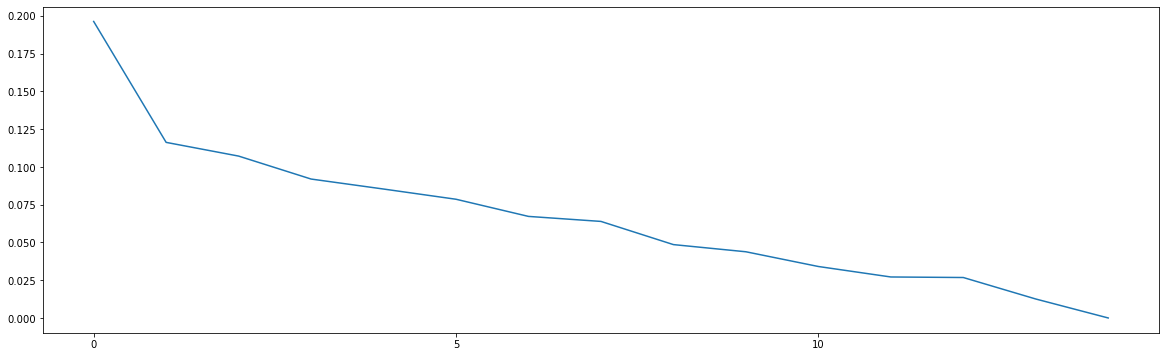

In [30]:
#Plot explained variance per number of leading PC's 
pca = PCA(df_scaled.shape[1])
data_Pca=pca.fit_transform(df_scaled)
eigenvalues = pca.explained_variance_ratio_
n=15
plt.figure(figsize = (20, 6))
plt.plot(np.arange(n),eigenvalues)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
#

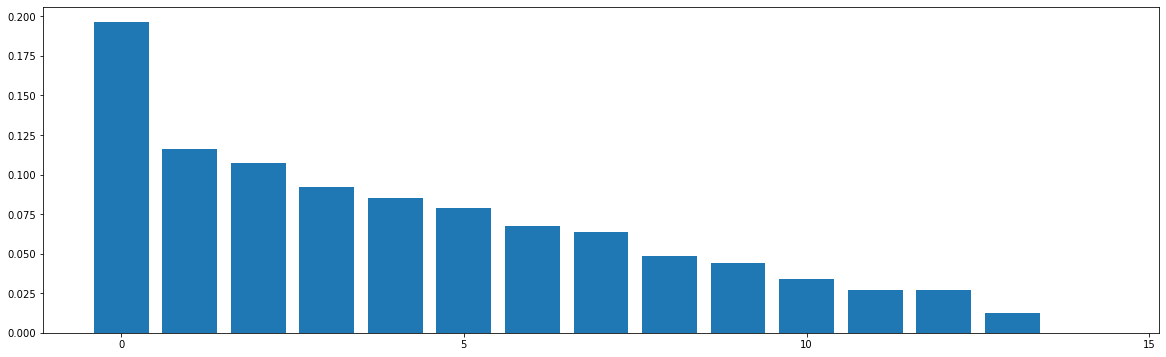

In [31]:
pca = PCA(df_scaled.shape[1])
data_Pca=pca.fit_transform(df_scaled)
eigenvalues = pca.explained_variance_ratio_
plt.figure(figsize = (20, 6))
plt.bar(np.arange(n),eigenvalues)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

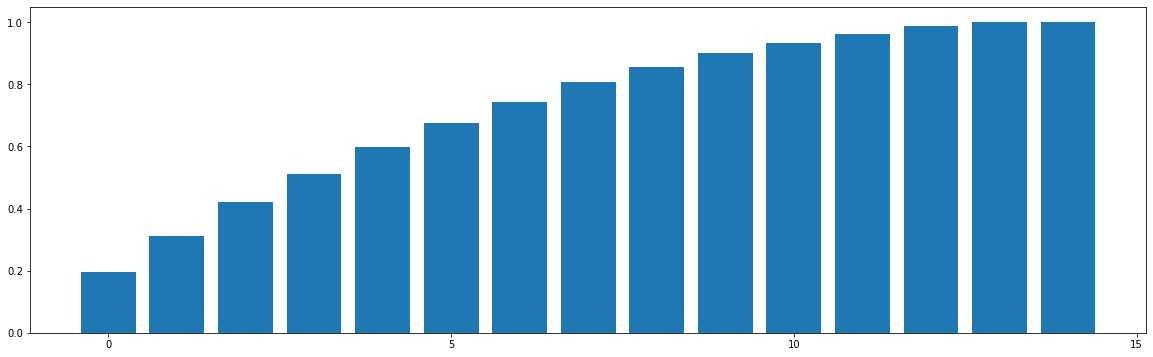

In [32]:
#perform PC decomposition over data
pca = PCA(df_scaled.shape[1])
data_Pca=pca.fit_transform(df_scaled)
eigenvalues = pca.explained_variance_ratio_
plt.figure(figsize = (20, 6))
plt.bar(np.arange(n),eigenvalues.cumsum())
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

In [33]:
eigenvalues[:7].cumsum()

array([0.19633708, 0.31260954, 0.41980589, 0.51180048, 0.59717866,
       0.67579445, 0.74304927])

#### plot explained variance barplot and comment on the appropriate number of eigenvectors based on that
we set Cumulative Percentage of Total Variation as 70%.from the plot and data, 7 is the appropriate number

In [34]:
## run linear regression again but with selected PCs
pca = PCA(7) #take only 7 leading principal components to get enough data but avoid overfitting
P_data=pca.fit_transform(df_scaled) #get principal components for the scaled training sample
lm1=sm.OLS(Y,sm.add_constant(P_data)).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     5.846
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           8.93e-05
Time:                        23:05:12   Log-Likelihood:                -83.283
No. Observations:                  50   AIC:                             182.6
Df Residuals:                      42   BIC:                             197.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3019      0.197      1.529      0.1

In [35]:
## report out of sample mean R2 score
np.random.seed(2018)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
Y=data.Y
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split((data.iloc[:,1:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(7) #take only 3 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))


IS R-squared is 0.544+-0.059
OS R-squared is 0.146+-0.239


use scaler to standardization first. As we can see out of sample mean R2 score 0.146. The performance is poor than before.

## 3: Modeling mean income with 311 complaint patterns

We'll use 311 complaints data set to model the mean income of zip codes in NYC. We will aslo check if using PCA in this case improves the performance as compared to just the linear model.

Note: no need to standardize data first as it is already normalized


In [36]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [37]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [38]:
#merge income data with 311
DataIncome1=dataIncome.merge(data311,left_index=True,right_index=True)
DataIncome1.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001.0,71244.6100,123112.7764,17678,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,30843.9574,46258.6118,70878,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,89998.5339,139330.9968,53609,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,110183.6857,156682.7615,1271,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0
10005.0,115133.2855,163762.6601,1517,0.000000,0.000000,0.008219,0.0,0.000000,0.002192,0.000548,...,0.000000,0.000000,0.000000,0.013699,0.000000,0.000548,0.000000,0.019726,0.0,0.0


### Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation. Train test split ratio: 70:30, run for 20 times.

In [39]:
#Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model 
data=DataIncome1.iloc[:,3:]
Y=DataIncome1.Mean
lm=sm.OLS(Y,sm.add_constant(data)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     23.81
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.11e-07
Time:                        23:05:13   Log-Likelihood:                -1611.6
No. Observations:                 175   AIC:                             3547.
Df Residuals:                      13   BIC:                             4060.
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [40]:
#report out of sample (test) accuracy after cross validation. Train test split ratio: 70:30
import warnings
warnings.filterwarnings('ignore')
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(data.iloc[:,:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

#run for 20 times.

IS R-squared is 1.000+-0.000
OS R-squared is -3.553+-4.329


### Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take. Same as before, train test split ratio: 70:30, run for 20 times.

In [41]:
#stadarlization
# standardization
scaler_data = preprocessing.StandardScaler().fit(data)
df_scaled =scaler_data.transform(data)  
df_scaled= pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.head()

,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
0,-1.213681,1.043378,1.136324,-0.365402,-0.357702,-0.436398,1.367911,3.273152,0.080566,0.375239,...,0.082894,-0.792897,-0.590244,0.662270,-0.162018,-0.554439,-0.844483,0.822579,-0.292506,-0.198071
1,-0.655918,-0.331102,0.226026,-0.365402,-0.357702,0.327935,0.198252,0.607330,0.195222,2.600424,...,0.090849,-0.554135,-0.562993,-0.095055,0.064308,-0.512907,-0.387209,-0.525243,-0.292506,-0.198071
2,-0.655571,0.501831,1.063102,-0.365402,0.834198,1.237580,0.666533,0.134769,0.195631,0.554351,...,0.434328,1.835111,-0.641072,0.262800,0.498343,-0.465103,-0.634160,-0.553141,-0.292506,-0.198071
3,-1.213681,-0.331102,0.621832,-0.365402,-0.357702,0.655347,0.507036,-0.249529,-0.462198,3.276901,...,0.488777,0.955334,-0.719247,1.098342,5.571281,-0.751043,-1.252881,-0.780460,-0.292506,-0.198071
4,-1.213681,-0.331102,0.394260,-0.365402,-0.357702,0.474669,-0.722082,0.508376,-0.462198,-0.469640,...,-0.765987,-0.792897,-0.719247,1.592264,-0.487320,-0.603908,-1.252881,-1.013575,-0.292506,-0.198071


In [42]:
len(data.columns)

162

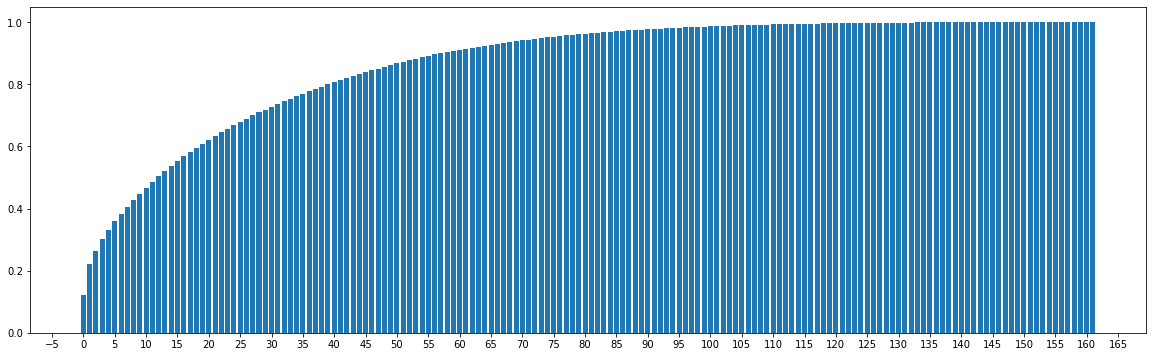

In [43]:
#perform PC decomposition over data
n=162
pca = PCA(df_scaled.shape[1])
data_Pca=pca.fit_transform(df_scaled)
eigenvalues = pca.explained_variance_ratio_
plt.figure(figsize = (20, 6))
plt.bar(np.arange(n),eigenvalues.cumsum())
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

In [44]:
eigenvalues[:20].cumsum()

array([0.12074288, 0.2219574 , 0.26341987, 0.30058852, 0.33069057,
       0.35880662, 0.38386804, 0.40646679, 0.42788267, 0.44843544,
       0.46760661, 0.48620144, 0.50386968, 0.52119032, 0.53744882,
       0.55298001, 0.56801195, 0.58240534, 0.596203  , 0.60939779])

we set Cumulative Percentage of Total Variation as 60%.from the plot and data, 20 is the appropriate number

In [45]:
np.random.seed(2018)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(20) #take only 3 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.838+-0.035
OS R-squared is 0.427+-0.353


### Task 3: Try implementing Lasso regression (feature selection) over all the PCs.

Use alpha=10000 as the regularization parameter. Report out of sample mean R2 score by splitting data into train and test. No train test split iteration is required.

In [46]:
#stadarlization
# standardization
scaler_data = preprocessing.StandardScaler().fit(data)
df_scaled =scaler_data.transform(data)  
df_scaled= pd.DataFrame(df_scaled, columns=data.columns)
df_scaled.head()

,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
0,-1.213681,1.043378,1.136324,-0.365402,-0.357702,-0.436398,1.367911,3.273152,0.080566,0.375239,...,0.082894,-0.792897,-0.590244,0.662270,-0.162018,-0.554439,-0.844483,0.822579,-0.292506,-0.198071
1,-0.655918,-0.331102,0.226026,-0.365402,-0.357702,0.327935,0.198252,0.607330,0.195222,2.600424,...,0.090849,-0.554135,-0.562993,-0.095055,0.064308,-0.512907,-0.387209,-0.525243,-0.292506,-0.198071
2,-0.655571,0.501831,1.063102,-0.365402,0.834198,1.237580,0.666533,0.134769,0.195631,0.554351,...,0.434328,1.835111,-0.641072,0.262800,0.498343,-0.465103,-0.634160,-0.553141,-0.292506,-0.198071
3,-1.213681,-0.331102,0.621832,-0.365402,-0.357702,0.655347,0.507036,-0.249529,-0.462198,3.276901,...,0.488777,0.955334,-0.719247,1.098342,5.571281,-0.751043,-1.252881,-0.780460,-0.292506,-0.198071
4,-1.213681,-0.331102,0.394260,-0.365402,-0.357702,0.474669,-0.722082,0.508376,-0.462198,-0.469640,...,-0.765987,-0.792897,-0.719247,1.592264,-0.487320,-0.603908,-1.252881,-1.013575,-0.292506,-0.198071


In [47]:
#find the pc first
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

In [48]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca,Y,test_size=0.3)

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10000)
lasso_reg=lasso.fit(X_train, y_train)

In [50]:
Y_pred = lasso_reg.predict(X_test)

In [51]:
R_OS=r2_score(y_test, Y_pred)
R_OS

0.46916692074097266

### Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation (80:20) and tuning the parameter $\alpha$ over the validation sample. Visualize the out-of-sample R2 v.s alpha value. And report the best $\alpha$. Then report the out of sample R2 from the best model.

Note: The $\alpha$ value search range is 10 to 1000. No train test split iteration here. 

In [52]:
# Implement cross-validation for Lasso PCA regression above with further 
#splitting the training sample into training and validation (80:20) 
#alpha=10000
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.2) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA() 
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    lasso = Lasso(alpha=10000)
    lasso_reg=lasso.fit(P_train, y_train)
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(lasso_reg.predict(P_test))
    R_OS.append(r2_score(y_test,y_pred))

print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))



OS R-squared is 0.532+-0.146


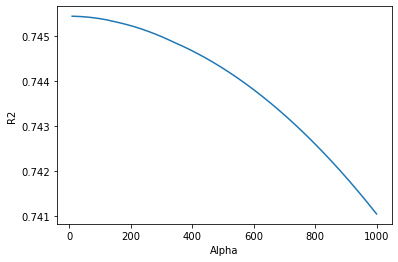

In [53]:
#stadarlization
# standardization

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

np.random.seed (123)
n_components = 10
alphas= np.arange(10,1001)

lasso_cv = LassoCV (alphas=alphas, cv=5)

X_train, X_test, y_train, _test = train_test_split(data.iloc[:,:],Y,test_size=0.2) 
pca = PCA (n_components=n_components)
X_train_pca = pca.fit_transform (X_train)
X_test_pca = pca.transform(X_test)

scaler1 = preprocessing.StandardScaler().fit(X_train_pca)
X_train_pca =scaler1.transform (X_train_pca)

scaler2 = preprocessing.StandardScaler().fit(X_test_pca)
X_test_pca = scaler2. transform (X_test_pca)
lasso_cv.fit(X_train_pca, y_train)
r2_scores = []
                                         
for alpha in lasso_cv.alphas_:
    lasso = Lasso (alpha=alpha)
    lasso.fit(X_train_pca, y_train)
    y_pred = lasso.predict(X_train_pca)
    r2 = r2_score(y_train, y_pred)
    r2_scores. append(r2)

plt.plot (lasso_cv.alphas_, r2_scores)
plt.xlabel('Alpha') 
plt.ylabel ('R2' ) 
plt.show ()


In [54]:
print(r2_scores.index(max(r2_scores)))

990


In [55]:
lasso_cv.alphas_[990],r2_scores[990]

(10, 0.74544245945467)

so best alpha is 10 and out-sample is 0.74544245945467.